In [ ]:
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append("../")

from model.neural_net import Neural_Network
from utils.logger import TrainingLogger
from utils.train import train

## Prepare dataset

This will use the MNIST dataset.

In [2]:
with np.load("../data/mnist.npz") as data:
    x_train = data["x_train"]
    y_train = data["y_train"]
    x_test = data["x_test"]
    y_test = data["y_test"]

some examples:

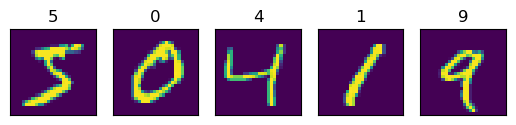

In [3]:
for i, (img, y) in enumerate(zip(x_train[:5].reshape(5, 28, 28), y_train[:5])):
    plt.subplot(151 + i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(y)

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
X_train = x_train.reshape(60000, -1).T / 255.0
X_test = x_test.reshape(10000, -1).T / 255.0

one hot encode y-test and y-train

classes = 10, because there are 10 output classes (digits from 0 to 9)

In [7]:
classes = 10

Y_train = np.zeros((classes, y_train.size))
Y_train[y_train, np.arange(y_train.size)] = 1

Y_test = np.zeros((classes, y_test.size))
Y_test[y_test, np.arange(y_test.size)] = 1

## Training

In [8]:
network = Neural_Network(input_layer_size=784, output_layer_size=10, hidden_layer_size=256)
logger = TrainingLogger()

In [9]:
train(network, X_train, Y_train, X_test, Y_test, logger, epochs=100, log_every=1)

[Epoch 0] Train Loss: 2.3027 | Val Loss: 2.3004 | Train Acc: 9.86% | Val Acc: 14.35%
[Epoch 1] Train Loss: 2.3005 | Val Loss: 2.2981 | Train Acc: 14.40% | Val Acc: 21.02%
[Epoch 2] Train Loss: 2.2983 | Val Loss: 2.2959 | Train Acc: 21.05% | Val Acc: 28.76%
[Epoch 3] Train Loss: 2.2960 | Val Loss: 2.2935 | Train Acc: 28.04% | Val Acc: 34.96%
[Epoch 4] Train Loss: 2.2938 | Val Loss: 2.2911 | Train Acc: 34.08% | Val Acc: 40.25%
[Epoch 5] Train Loss: 2.2914 | Val Loss: 2.2886 | Train Acc: 38.72% | Val Acc: 44.53%
[Epoch 6] Train Loss: 2.2890 | Val Loss: 2.2860 | Train Acc: 42.67% | Val Acc: 47.79%
[Epoch 7] Train Loss: 2.2864 | Val Loss: 2.2833 | Train Acc: 46.38% | Val Acc: 50.83%
[Epoch 8] Train Loss: 2.2838 | Val Loss: 2.2804 | Train Acc: 49.59% | Val Acc: 53.69%
[Epoch 9] Train Loss: 2.2809 | Val Loss: 2.2773 | Train Acc: 52.22% | Val Acc: 55.70%
[Epoch 10] Train Loss: 2.2780 | Val Loss: 2.2740 | Train Acc: 54.24% | Val Acc: 57.47%
[Epoch 11] Train Loss: 2.2748 | Val Loss: 2.2705 | Tra

## Evaluation

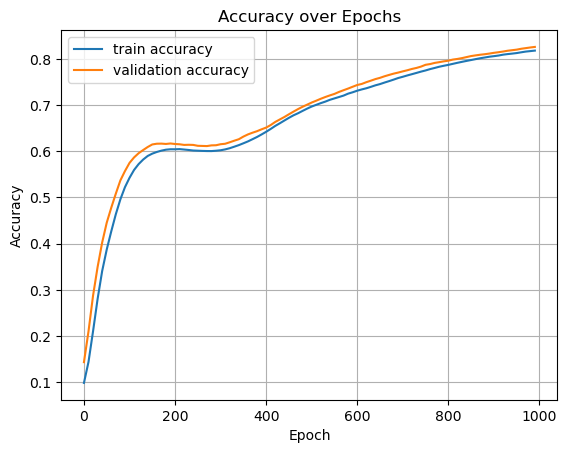

In [10]:
logger.plot_accuracies()

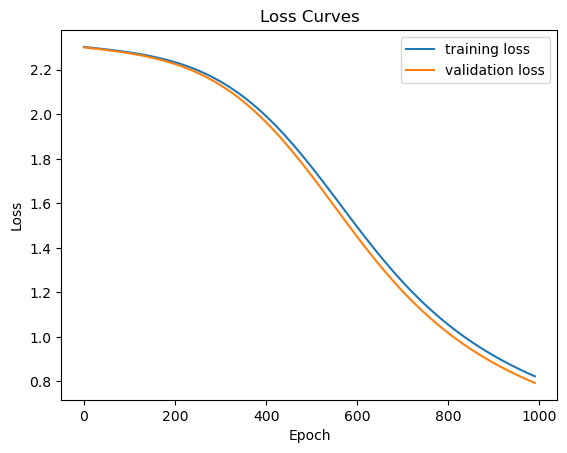

In [11]:
logger.plot_losses()

plot some of the misclassified numbers:

In [12]:
A2_test = network.forward(X_test)

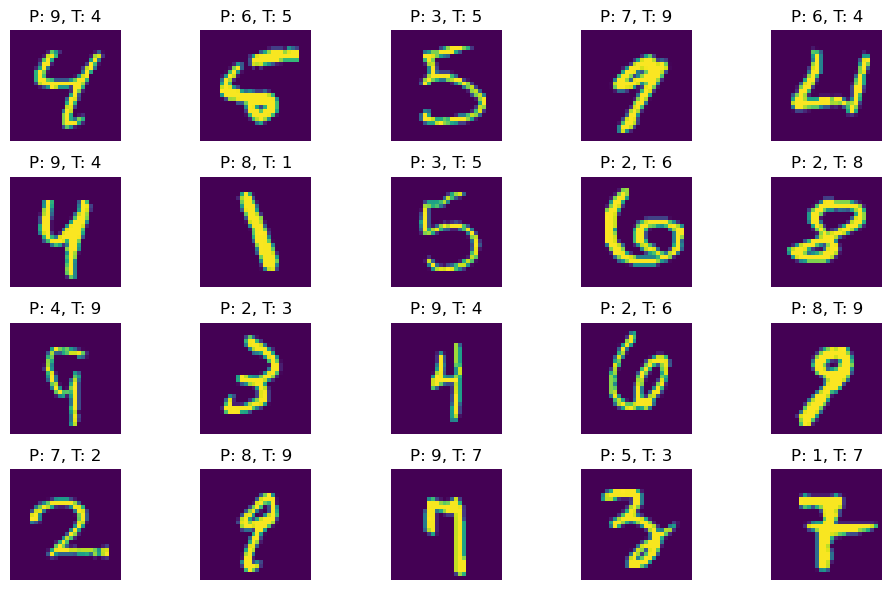

In [13]:
total = 20

misclassified = []

for i in range(A2_test.shape[1]):
  pred = np.argmax(A2_test[:, i])
  true = y_test[i]

  if pred != true:
    img = x_test[i].reshape(28, 28)
    misclassified.append((img, pred, true))

    if len(misclassified) == total:
      break

cols = 5
rows = total // cols + (total % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))

for idx, (img, pred, true) in enumerate(misclassified):
    ax = axes[idx // cols, idx % cols]
    ax.imshow(img)
    ax.set_title(f"P: {pred}, T: {true}")
    ax.axis('off')

# Hide any unused subplots
for j in range(len(misclassified), rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout()
plt.show()